<a href="https://colab.research.google.com/github/mens0n/-ML-Carrier-customer-management/blob/main/Carrier_customer_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test3.csv to test3.csv


# 1.Business Understanding
- 통신사 고객 관리
- 통신사는 고객과의 약정을 통해 정기적으로 현금 흐름을 만들어냄
- 고객의 인원수가 중요(신규 고객 유치와 기존 고객 이탈 방지를 병행)
- 고객 이탈과 가장 관련있는 요인이 무엇인지 확인
- 유사한 특징을 보이는 고객 그룹이 발견되면, 각 그룹별 이탈률을 알아보고 이탈률이 높은 그룹은 집중관리 하고자 함

# 2.Data Understanding
#### 고객 정보
- customerID: 고객 식별정보
- gneder: 성별(male, female)
- SeniorCitizen: 연장자 여부(1, 0)
- Prartner: 독신여부(Y, N)
- Dependents: 부양가족 유무(Y, N)
- tenure: 서비스 이용기간(개월 수)

#### 이용 서비스 정보
- PhoneService: 전화 서비스 이용여부(번호를 할당받아 쓰는지)
- MultipleLines: 다중회선 이용여부
- InternetService: 인터넷 서비스 이용여부(이용시 종류)
- OnlineSecurity: 보안 서비스 이용여부
- OnlineBackup: 정보 백업서비스 이용여부
- DeviceProtection: 단말기 보험서비스 이용여부
- TechSupport: 기술지원 서비스 이용여부
- StreamingTV: 스트리밍 TV
- StreamingMovies: 스트리밍 영화 서비스
#### 고객 결제 정보
- Contract: 결제 갱신주기
- PaperlessBilling: 종이로 출력하지 않는 통지서의 여부
- PaymentMethod: 결제방식(온라인 청구서, 지로통지 등)
- MothlyCharges: 월 청구금액
- TotalCharges: 총 청구금액(계약 기간동안 총 납부금액)
- Churn: 이탈여부(다른 통신사로 이동)

In [2]:
import pandas as pd
df = pd.read_csv('test3.csv')
print(df.shape)
df.head().T

(7043, 21)


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.sort_values(by = 'TotalCharges')['TotalCharges']

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [5]:
df.sort_values(by = 'TotalCharges')['TotalCharges'][936]

' '

## 빈 값 처리 방법(NULL 처리)
1. 그냥 지우기: 비율이 적을 때 사용(지운 여부에 따라 데이터셋이 크게 달라지지 않을 때)
2. 도메인 지식을 이용해서 채워넣기: 패턴이 있는 경우, 논리적인 근거가 있는 경우
3. 평균 대체법: 숫자는 평균, 경우의 수는 'other'로 채워넣기
4. 해당 Column을 Label로 두고, ML이 학습하여 predict로 빈 값을 채워넣기

In [6]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


SeniorCitizen의 값은 0과 1인데, 현재 Row에서는 모두 0이다.그렇다면 SeniorCitizen의 값이 0인 Row는 TotalCharges가 빈 칸인 Row라고 볼 수 있을까?

In [7]:
df['SeniorCitizen'].describe()
# 대표성이 없다

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

현재 Dependents는 대표성이 있는가?

In [8]:
df.loc[df['Dependents'] == 'Yes']
# 대표성이 없다

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


tenure는 대표성이 있는가?

In [9]:
df.loc[df['tenure'] == 0]
# tenure이 0인 Row와 TotalCharges가 빈 칸인 Row는 같다(Row의 수가 적어서(11개) 확인 가능)
#    즉, 1개월 미만인 고객은 총 납부금액이 없다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.loc[df['TotalCharges'] == ' ']['customerID'].values

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [11]:
df.loc[df['tenure'] == 0]['customerID'].values

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [12]:
# 갯수가 적어 육안으로 같은걸 확인할 수 있지만 보다 많은 경우 집합 성질을 이용할 수 있다.
tc_null = set(df.loc[df['TotalCharges'] == ' ']['customerID'].values)
te_null = set(df.loc[df['tenure'] == 0]['customerID'].values)

print(len(tc_null.difference(te_null)))
print(len(te_null.difference(tc_null)))

0
0


In [13]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:float(x))

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## 경우의 수 0,1로 변경

In [15]:
set(df['Churn'])

{'No', 'Yes'}

In [16]:
# Churn은 경우의 수 -> 0과 1로 변경
df['Churn_num'] = df['Churn'].map({'Yes':1, 'No':0})
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Data Exploration

고객들의 계약 유지 기간에 따른 이탈률 확인

In [17]:
import numpy as np
te_ch = df.groupby('tenure').agg({'Churn_num':np.mean}).reset_index()
te_ch

,tenure,Churn_num
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


## Visualization

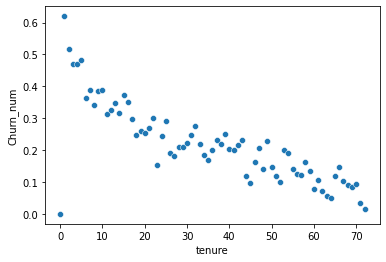

In [19]:
import seaborn as sns
sns.scatterplot(data = te_ch, x = 'tenure', y = 'Churn_num')

### 추세선(회귀선)
- https://seaborn.pydata.org/generated/seaborn.lmplot.html 참조

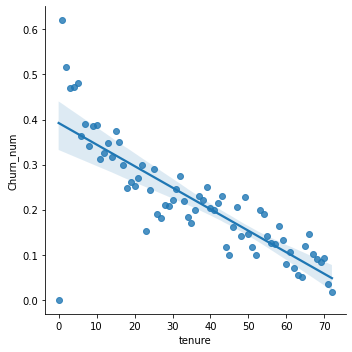

In [20]:
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num')

In [22]:
hue = 'Dependents'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
te_ch

,tenure,Dependents,Churn_num
0,0,Yes,0.000000
1,1,No,0.632613
2,1,Yes,0.557692
3,2,No,0.538095
4,2,Yes,0.357143
...,...,...,...
140,70,Yes,0.063830
141,71,No,0.038095
142,71,Yes,0.030769
143,72,No,0.020000


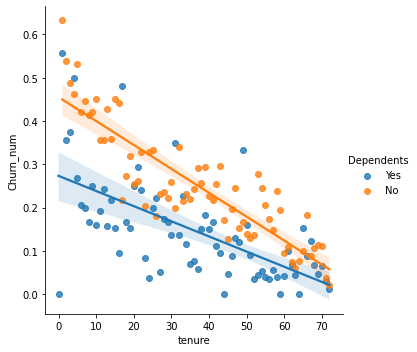

In [23]:
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

# 계약기간이 길어짐에 따라 이탈률이 감소한다는 특징은 유지
# 부양가족이 있는 경우가 부양가족이 없는 경우보다 이탈률이 낮음

In [24]:
df.describe(include = 'object')
# count : 개수
# unique : 서로 다른 데이터 개수
# top : 일반적인 값
# freq : 가장일반적인 값의 빈도

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,2926-JEJJC,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [25]:
df.describe(include = 'object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

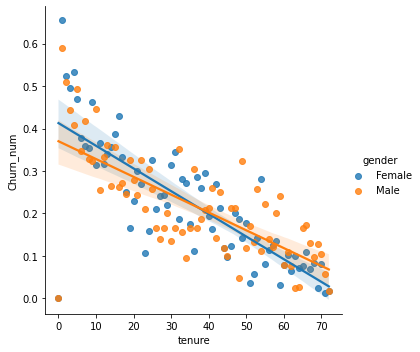

In [26]:
hue = 'gender'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)
# 성별에 따른 차이가 발견되지 않음

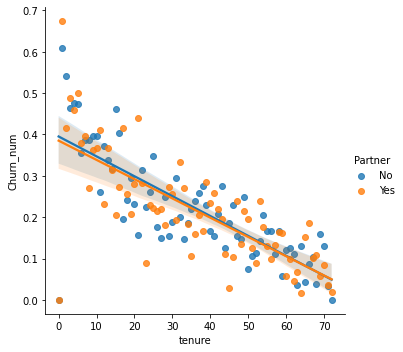

In [27]:
hue = 'Partner'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

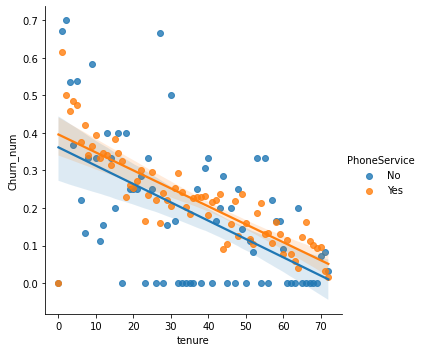

In [29]:
hue = 'PhoneService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

# 사용하지 않으면 이탈률이 전체적으로 낮아지는 경향이 있지만
# 이탈률이 0&인 경우가 많고 편차도 큼
# 전화 사용여부에 따른 차이가 발견되지 않음

In [31]:
df.loc[df['tenure'] == 32]['PhoneService'].value_counts()

# 32개월 동안 휴대폰 서비스를 사용하지 않은 사람은 4명
# 이 4명이 이탈하지 않았으면 0%가 된다
# 즉, 경우의 수가 너무 적기 때문에 전화 사용여부에 따른 차이가 발견되었다고 볼 수 없음

Yes    65
No      4
Name: PhoneService, dtype: int64

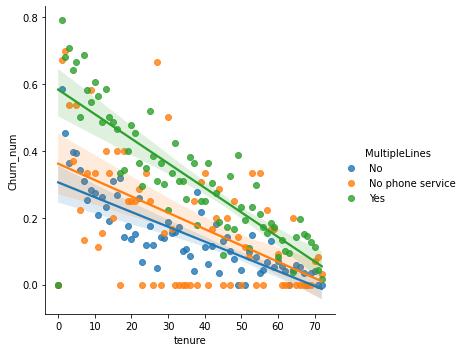

In [32]:
hue = 'MultipleLines'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

# 다중회선을 사용하면 이탈률이 높아지는 경향 확인

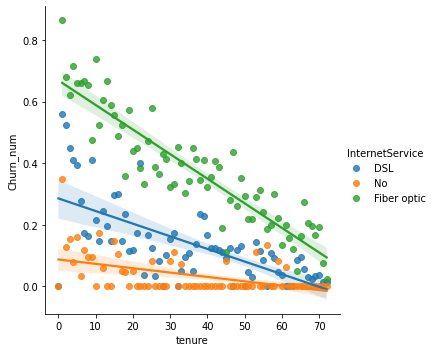

In [35]:
hue = 'InternetService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

# 인터넷 속도가 증가할수록(빠른 인터넷을 쓸수록) 이탈률이 높아지는 경향을 보임

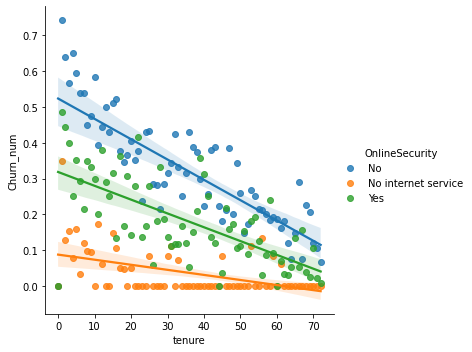

In [36]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data = te_ch, x = 'tenure', y = 'Churn_num', hue = hue)

# 보안 서비스를 이용하면 이탈률이 낮아지는 경향 확인

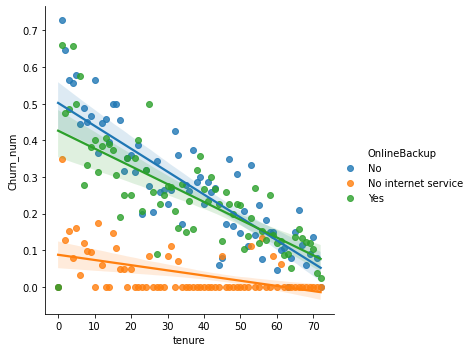

In [37]:
hue = 'OnlineBackup'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 백업 서비스 이용여부에 따른 이탈률의 차이가 없음

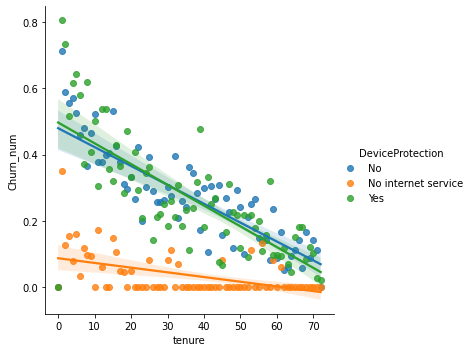

In [38]:
hue = 'DeviceProtection'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 기기 보호 서비스 이용여부에 따른 이탈률의 차이가 없음

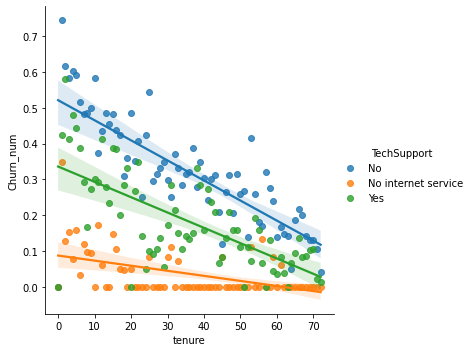

In [39]:
hue = 'TechSupport'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 기술 지원 서비스를 이용하면 이탈률이 낮아지는 경향 발견

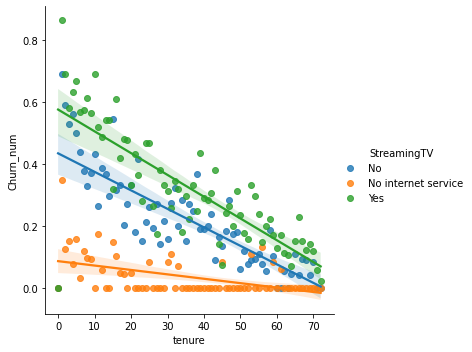

In [40]:
hue = 'StreamingTV'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 스트리밍 TV 서비스를 이용하면 이탈률이 높아지는 경향 발견

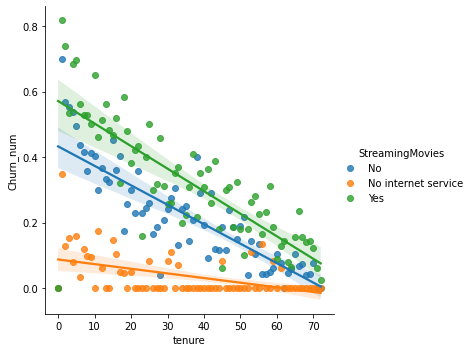

In [41]:
hue = 'StreamingMovies'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 스트리밍 영화 서비스를 이용하면 이탈률이 높아지는 경향 발견

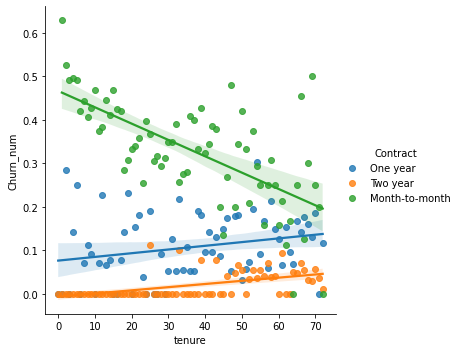

In [42]:
hue = 'Contract'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약기간이 늘어남에 따라 이탈률이 감소한다는 특징이 유지되지 않음 -> 기존 Column들과 차이가 있음
# 2년 계약의 경우: tenure가 24(개월)까지 0%이고, 이후에 취소함
# 1년 계약의 경우: 위의 특징이 나타나지 않음
# 결제 갱신주기가 짧아질수록 이탈률이 높아지는 경향 발견

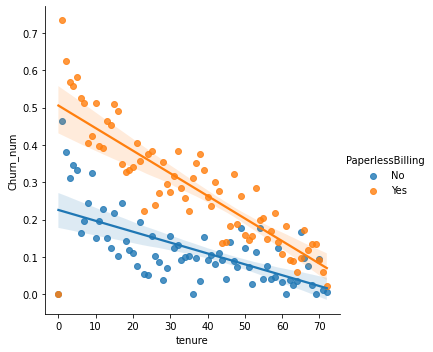

In [43]:
hue = 'PaperlessBilling'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 통지서가 Paperless일 경우 이탈률이 높아지는 경향이 발견

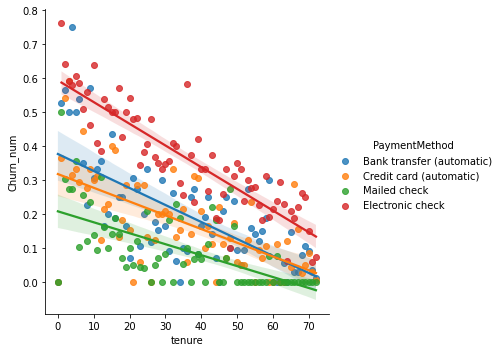

In [44]:
hue = 'PaymentMethod'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계좌이체와 카드 결제는 자동결제로 유사한 특징이 있음
# 지로통지서는 이탈률이 가장 낮음
# 전자통지서는 이탈률이 가장 높음
# 자동결제 방식은 중간 수준의 이탈률을 보임

공통 특징
- 계약기간이 길어짐에 따라 이탈률이 감소
- 성별이나 독신여부에 따른 차이는 없음
- 전화 사용여부, 백업, 기기보호 서비스 이용여부에 따른 이탈여부 차이는 없음

고객 정보 기반
- 부양가족이 있는 경우가 부양가족이 없는 경우보다 이탈률이 낮음

서비스 종류 기반
- 인터넷 속도 증가할수록(돈을 더 낼수록) 이탈률이 높아짐
- 다중회선, 스트리밍TV, 영화 서비스 이용시(돈을 더 낼수록) 이탈률 높아짐
- 보안, 기술지원 서비스 이용하지 않으면(돈을 안 낼수록) 이탈률 높아짐

계약 정보 기반
- 계약기간이 늘어남에 따라 이탈률이 감소한다는 특징이 유지되지 않음
- 결제 갱신주기가 짧아질수록 이탈률이 높아짐
- 통지서가 Paperless일 경우 이탈률이 높아짐
- 지불 방식의 발전 순서대로 이탈률이 높아짐, 결제 방식에 따라 연령대를 유추할 수 있음

## Data Preparation
- 이상치 판별과 처리 : 기준을 정해 기준선 밖에 있으면 이상치
- scaling: 변수의 범위 조정
- 경우의 수 Column 처리
- 교차검증: 평가하는 과정을 여러 번 반복

### 이상치(Outlier)
- 기준을 정해서 기준서 밖에 있으면 이상치로 판단

####기준을 정하는 방법
- 평균에서 n표준편차 이상 떨어진 것을 이상치라 판단 -> 신뢰할 수 없음(이상치가 엄청 큰 값이 들어있을 수 있음)
- ex) 평균으로부터 엄청 크거나 작은 값이 있는 이에 대한 경우의 수가 적으면 평균과 표준편차의 의미가 퇴색됨
- ex) 애초에 평균을 구할 때부터 이상치가 있으면 평균을 구할 때 잘못된 평균이 구해짐
- IQR, MAD, MCOD, Hotelling's T2, SPE

####식별된 이상치가 있는 경우 대처법
- 경우의 수가 적으면 지움
- 경계선의 값으로 대체(Winsorize)
- Business Understanding에서 설정한 방향성이 이상치 탐지인 경우 -> Label로 둠
- ex) 백화점은 연 1회 누적결제시 VVIP 등급으로 특별관리대상

#### IQR(Inter Quartile Range)
- Inter: a와 b의 사이
- Quatile: 크기 순으로 정렬했을 때, 4분할하여 순서상 25% 등수와 75% 등수
- Range: 범위
- Range를 벗어나면 이상치로 판단

In [45]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [49]:
tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]
iqr = 1.5 * (desc['75%'] - desc['25%'])
upper_lim = desc['75%']+iqr
lower_lim = desc['25%']+iqr

df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,0
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0


#### Scaling
- 변수의 범위를 조정해주는 것
- 언제 scaling 할까?
1. 단위가 큰 Column이 작은 Column에 비해 학습 단계에서 미치는 영향이 큰 경우 -> 이 영향을 최소화하기 위해 scaling 함
2. 그래프 그릴 때, 같은 축(y축)을 공유해 시각화하는 경우
3. 자릿수가 작아야 속도가 빠른 경우 ex) SVM, 이미지 DL

###### scaling 종류
- min-max: 최소값(0), 최대값(1)
- standard: 평균을 0으로, 표준편차 1로
- robust: 중간값(median)을 0으로 IQR을 1로
- 이상치에 미치는 영향도: min-max > standard > robust

###### scaling할 때 이상치를 고려해야 하는 이유
- 계산 과정상 이상치(매우 크거가 작은 값이)가 직접 반영되기 때문에



In [52]:
# a - a = 0
# a / a = 1
# 0 * ? = 0
# 0 / ? = 0

tgt_col = 'tenure'
minus_min = df[tgt_col] - np.min(df[tgt_col])
minus_min
# 최소값 0으로 만들고

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [53]:
# 최대값으로 일괄 나누기
scaled = minus_min / np.max(minus_min)
scaled

0       0.013889
1       0.472222
2       0.027778
3       0.625000
4       0.027778
          ...   
7038    0.333333
7039    1.000000
7040    0.152778
7041    0.055556
7042    0.916667
Name: tenure, Length: 7043, dtype: float64

In [54]:
df[tgt_col + '_scal'] = scaled
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


tenure 뿐만 아니라 MonthlyCharges, TotalCharges도 scaling 하기

In [55]:
scal_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_col:
  minus_min = df[tgt_col] - np.min(df[tgt_col])
  df[tgt_col + '_mm_scal'] = minus_min / np.max(minus_min)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scal,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,0.449599,0.462803,0.262497
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,0.341104,0.299403,0.261007
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,0.125000,0.171642,0.045891
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,0.402778,0.518408,0.160574
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,0.763889,0.712438,0.436003
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# standard scaling

scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
tgt_col = scal_cols[0]
minus_min = df[tgt_col] - np.mean(df[tgt_col]) # 평균으로 빼고
df[tgt_col + '_scal'] = minus_min / np.std(minus_min) # 표준편차로 나누기
df.describe()[tgt_col + '_scal']

count    7.043000e+03
mean    -4.066982e-17
std      1.000071e+00
min     -1.318165e+00
25%     -9.516817e-01
50%     -1.372744e-01
75%      9.214551e-01
max      1.613701e+00
Name: tenure_scal, dtype: float64

### 경우의 수 Column 변환 과정
- yes - no 인 경우 --> 1 - 0 으로 변환
- 기준을 정했을 때 정도의 차이가 발생한다면 이를 데이터에 반영


In [57]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [58]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for tgt in yes_no_cols:
    mapper = {'No': 0, 'Yes':1}
    df[tgt+'_num'] = df[tgt].map(mapper)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_scal,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,-1.277445,0.013889,0.115423,0.003437,1,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0.066327,0.472222,0.385075,0.217564,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,-1.236724,0.027778,0.354229,0.012453,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0.514251,0.625000,0.239303,0.211951,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,-1.236724,0.027778,0.521891,0.017462,0,0,1,1


In [59]:
set(df['InternetService'])

{'DSL', 'Fiber optic', 'No'}

In [60]:
mapper = {'No':0, 'DSL':0.5, 'Fiber optic':1}
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scal,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,-4.066982e-17,0.449599,0.462803,0.262497,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,1.000071e+00,0.341104,0.299403,0.261007,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,-1.318165e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,-9.516817e-01,0.125000,0.171642,0.045891,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,-1.372744e-01,0.402778,0.518408,0.160574,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,9.214551e-01,0.763889,0.712438,0.436003,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.613701e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_num', 'tenure_scal', 'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [62]:
interested = ['SeniorCitizen', 'Churn_num', 'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

df[interested].to_csv('test3_modify.csv', index=False)

In [63]:
df = pd.read_csv('test3_modify.csv')
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed'],
      dtype='object')

### label, Features split

In [64]:
# label
label = 'Churn_num'

# Features
features = ['SeniorCitizen', 'tenure_mm_scal', 'MonthlyCharges_mm_scal', 
            'TotalCharges_mm_scal', 'Partner_num', 'Dependents_num', 
            'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

X, y = df[features], df[label]

# 교차검증(Cross-Validation)
- test 셋이 너무 적으면 학습 결과가 불안정함 -> 교차검증을 이용해 안정적인 검증 점수를 획득
- train 셋을 조금 떼어내 평가하는 과정을 여러 번 반복하고 점수를 평균하여 최종 검증 점수 획득
- train/test split + model.fit + model.score

###### 교차검증 순서
1. Row의 순서를 섞음
2. 데이터셋을 k 등분(k-fold CV)
3. 첫 번째 데이터셋을 test(검증용)로, 나머지를 train(학습용)으로 사용
4. train 데이터로 학습(model.fit)하고, test 데이터로 채점(model.socre)해서 점수 확인
5. 두 번째 데이터셋을 test로 하고 3, 4 단계를 k번 반복
6. 평가지표(채점) 점수가 k개 생김 -> 이를 평균(cv-score)

In [65]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf

model = rf()

cvs(model, X, y, cv = 5, scoring = 'precision')

array([0.59      , 0.60135135, 0.55434783, 0.59868421, 0.6013289 ])

In [68]:
np.mean(cvs(model, X, y, cv = 5, scoring = 'precision'))

0.5927657023795383

# 지도학습(supervised learning)
- 정답이 있는(label이 있음) 데이터로 학습하는 방식
- feature와 label 관계 패턴을 학습
- 사례: 분류, 회귀

# 비지도 학습(unsupervised learning)
- 정답이 없는(label이 없음) 데이터로 학습하는 방식
- feature 간 관계 패턴을 학습
- 비지도 학습의 알고리즘들은 목적이 정해져 있음
- 사례: 군집화(clustering), 차원 축소(dimensionality redution)

# 군집 알고리즘
- 데이터를 여러 그룹으로 묶음(유사한 Row들 끼리 그룹화)

In [70]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4)
model.fit(X)

KMeans(n_clusters=4)

In [71]:
model.labels_

array([0, 1, 2, ..., 3, 0, 2], dtype=int32)

In [72]:
df['cluster'] = model.labels_
df.head()

,SeniorCitizen,Churn_num,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed,cluster
0,0,0,0.013889,0.115423,0.003437,1,0,0,1,0.5,0
1,0,0,0.472222,0.385075,0.217564,0,0,1,0,0.5,1
2,0,1,0.027778,0.354229,0.012453,0,0,1,1,0.5,2
3,0,0,0.625000,0.239303,0.211951,0,0,0,0,0.5,1
4,0,1,0.027778,0.521891,0.017462,0,0,1,1,1.0,2


In [73]:
# 각 그룹별 이탈률 확인
df.groupby('cluster').agg({label:np.mean})

,Churn_num
cluster,
0,0.283102
1,0.210707
2,0.410953
3,0.098259


In [74]:
np.mean(df[label])

# 전체 고객 중 26% 정도 이탈하는데
# 어떤 그룹은 평균 대비 2배 정도 이탈률이 높거나 낮다

0.2653698707936959

In [75]:
# 고객들을 선별하여 feature들의 평균을 구함
# 이를 해당 그룹의 특징(cluster_mean)

df.loc[df['cluster'] == 3][features].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.036070
1,tenure_mm_scal,0.547739
2,MonthlyCharges_mm_scal,0.268916
3,TotalCharges_mm_scal,0.216431
4,Partner_num,0.994403
5,Dependents_num,0.741915
6,PhoneService_num,0.864428
7,PaperlessBilling_num,0.244403
8,InternetSpeed,0.319030


# 시각화

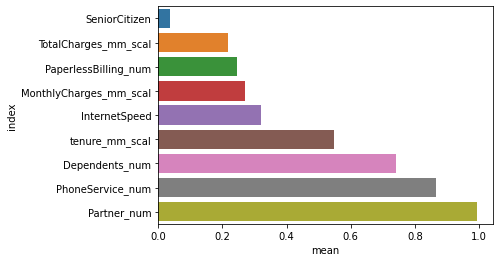

In [76]:
# 이탈률이 낮은 그룹의 특징
for_plot = df.loc[df['cluster'] == 3][features].describe().T['mean'].reset_index()
sns.barplot(data = for_plot.sort_values(by = 'mean'), x = 'mean', y = 'index')

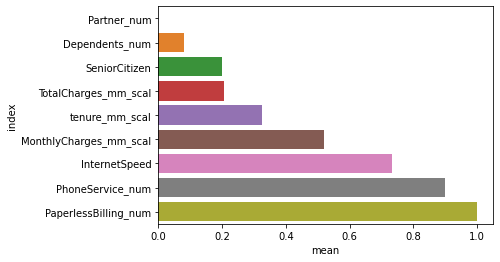

In [77]:
# 이탈률이 높은 그룹의 특징
for_plot = df.loc[df['cluster'] == 2][features].describe().T['mean'].reset_index()
sns.barplot(data = for_plot.sort_values(by = 'mean'), x = 'mean', y = 'index')